In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

random_seed = 19473490

data = pd.read_csv('spotify52kData.csv')

# data = data.dropna()

data.head(10)

,songNumber,artists,album_name,track_name,popularity,duration,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
5,5,Tyrone Wells,Days I Will Remember,Days I Will Remember,58,214240,False,0.688,0.4810,6,-8.807,1,0.1050,0.2890,0.000000,0.1890,0.6660,98.017,4,acoustic
6,6,A Great Big World;Christina Aguilera,Is There Anybody Out There?,Say Something,74,229400,False,0.407,0.1470,2,-8.822,1,0.0355,0.8570,0.000003,0.0913,0.0765,141.284,3,acoustic
7,7,Jason Mraz,We Sing. We Dance. We Steal Things.,I'm Yours,80,242946,False,0.703,0.4440,11,-9.331,1,0.0417,0.5590,0.000000,0.0973,0.7120,150.960,4,acoustic
8,8,Jason Mraz;Colbie Caillat,We Sing. We Dance. We Steal Things.,Lucky,74,189613,False,0.625,0.4140,0,-8.700,1,0.0369,0.2940,0.000000,0.1510,0.6690,130.088,4,acoustic
9,9,Ross Copperman,Hunger,Hunger,56,205594,False,0.442,0.6320,1,-6.770,1,0.0295,0.4260,0.004190,0.0735,0.1960,78.899,4,acoustic


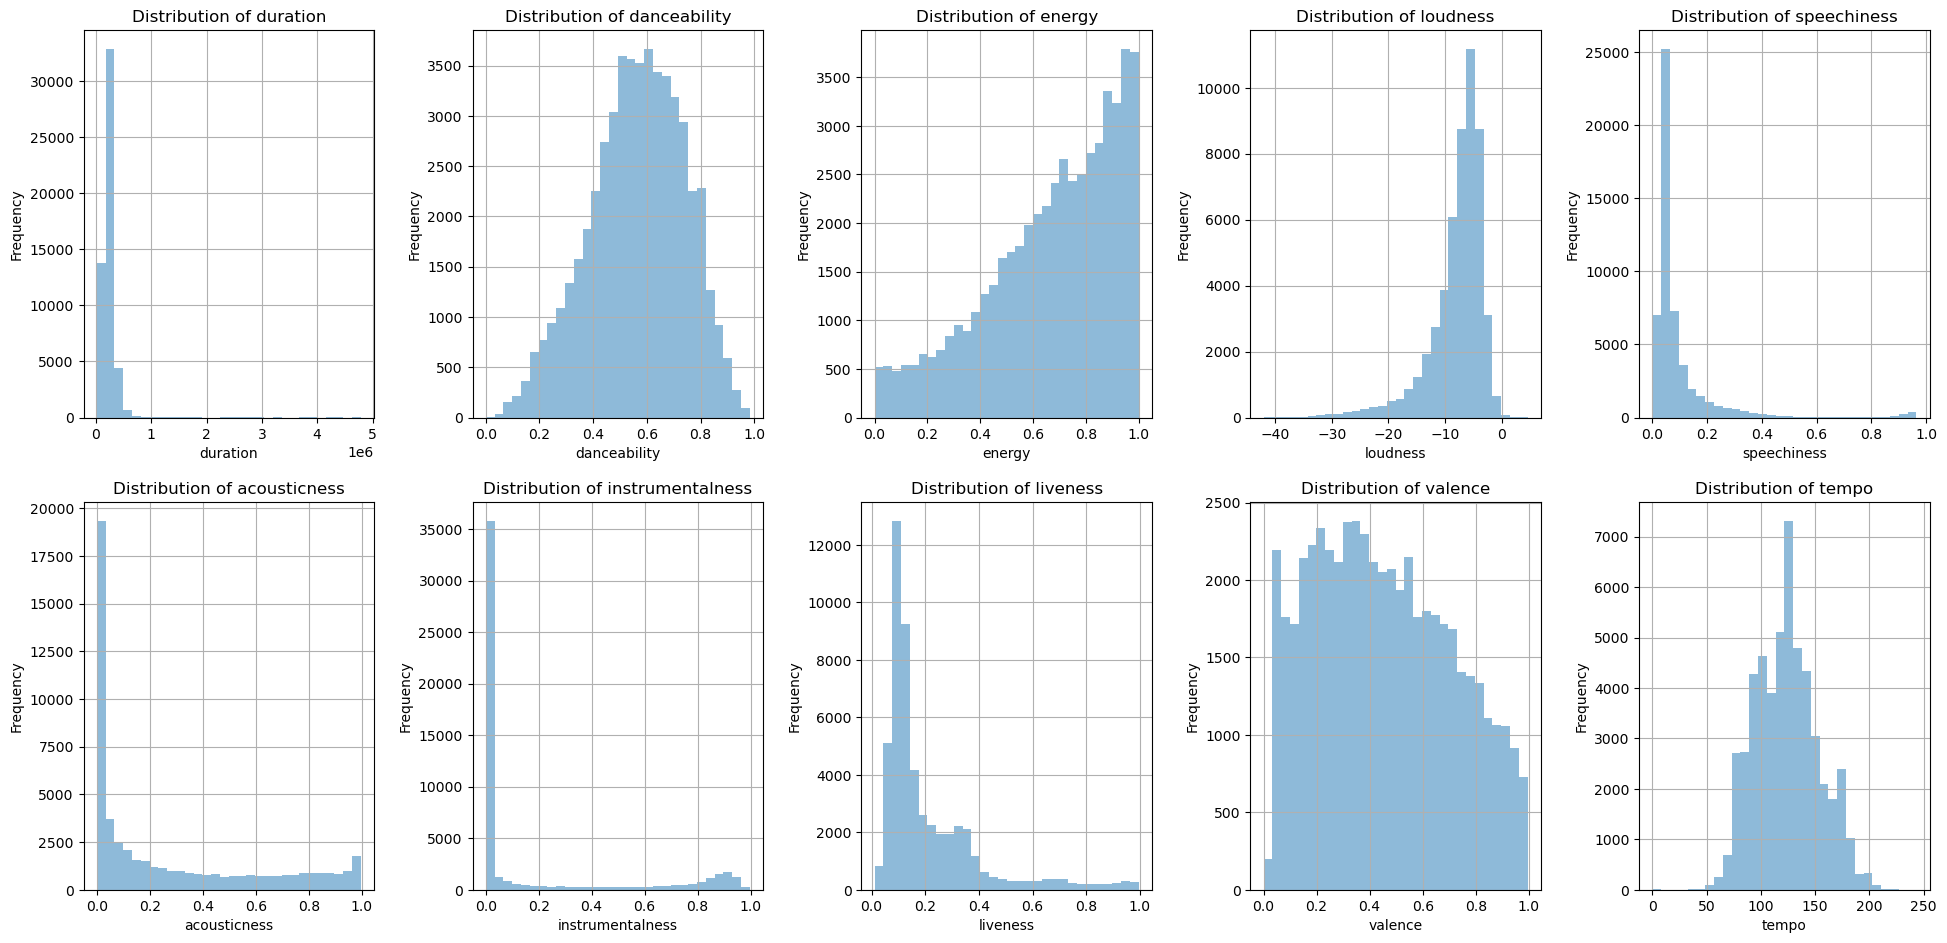

In [20]:
#Code for Question 1

features_to_plot = ['duration', 'danceability', 'energy','loudness','speechiness','acousticness','instrumentalness','liveness','valence','tempo']

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 10))
fig.tight_layout(pad=4.0)

for i, feature in enumerate(features_to_plot):
    row = i // 5
    col = i % 5
    axes[row, col].hist(data[feature], bins=30, alpha=0.5)
    axes[row, col].set_title(f'Distribution of {feature}')
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel('Frequency')
    axes[row, col].grid(True)

plt.show()

In [21]:
from scipy import stats

# List of features to test
features = ['duration', 'danceability', 'energy', 'loudness', 'speechiness',
            'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

# Initialize a dictionary to hold the KS test results
ks_test_results = {}

# Perform KS test for each feature
for feature in features:
    # KS test against a normal distribution
    statistic, p_value = stats.kstest(data[feature], 'norm', args=(data[feature].mean(), data[feature].std()))
    ks_test_results[feature] = {'Statistic': statistic, 'p-value': p_value}

# Convert results to a DataFrame for better visualization
ks_test_results_df = pd.DataFrame(ks_test_results).T

print(ks_test_results_df)


                  Statistic        p-value
duration           0.135364   0.000000e+00
danceability       0.031586   1.662645e-45
energy             0.092424   0.000000e+00
loudness           0.134407   0.000000e+00
speechiness        0.290936   0.000000e+00
acousticness       0.199853   0.000000e+00
instrumentalness   0.365968   0.000000e+00
liveness           0.199768   0.000000e+00
valence            0.052616  1.472504e-125
tempo              0.042121   1.333111e-80


**Answer to Question 1**
Among the 10 song features, "danceability" seems to conform normal distribution the most. However after we run the KS test, we have the result and we give out the following conclusion:

The results of the Kolmogorov-Smirnov (KS) tests for each of the 10 song features in our dataset indicate that none of these features are normally distributed. This conclusion is drawn from the fact that the p-values for all features are extremely close to zero, which strongly suggests rejection of the null hypothesis (that the sample comes from a normal distribution) for each feature.

Here are the specific KS test statistics and p-values for each feature:

1. Duration: Statistic = 0.135364, p-value ≈ 0.0;
2. Danceability: Statistic = 0.031586, p-value ≈ 0.0
3. Energy: Statistic = 0.092424, p-value ≈ 0.0
4. Loudness: Statistic = 0.134407, p-value ≈ 0.0
5. Speechiness: Statistic = 0.290936, p-value ≈ 0.0
6. Acousticness: Statistic = 0.199853, p-value ≈ 0.0
7. Instrumentalness: Statistic = 0.365968, p-value ≈ 0.0
8. Liveness: Statistic = 0.199768, p-value ≈ 0.0
9. Valence: Statistic = 0.052616, p-value ≈ 0.0
10. Tempo: Statistic = 0.042121, p-value ≈ 0.0

Given these results, we can conclude that none of the 10 features we are considering (duration, danceability, energy, loudness, speechiness, acousticness, instrumentalness, liveness, valence, and tempo) are normally distributed in our dataset.

However, since we have arguably large sample size (~52000) here, a minor deviation from standard deviation may result in rejection of null hypothesis (when performing KS test). Thus here we still can say that danceability "conforms" normal distribution and we might still able to use it for linear regression analysis.

<function matplotlib.pyplot.show(close=None, block=None)>

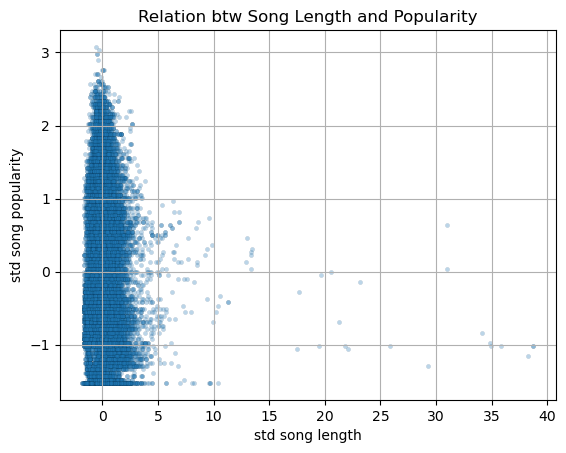

In [22]:
#Code for Question 2
import seaborn as sns

def makeStandard(feature):
  mean = data[feature].mean()
  std = data[feature].std()
  return (data[feature]-mean)/std


length_std = makeStandard('duration')
popularity_std = makeStandard('popularity')

plt.scatter(length_std, popularity_std, s=10, alpha=0.3, edgecolors='black', linewidths=0.1)
plt.xlabel('std song length')
plt.ylabel('std song popularity')
plt.title('Relation btw Song Length and Popularity')
plt.grid(True)

plt.show

In [23]:
from scipy.stats import pearsonr, spearmanr

# Perform Pearson correlation analysis
pearson_corr, pearson_pvalue = pearsonr(data['duration'], data['popularity'])

# Perform Spearman correlation analysis
spearman_corr, spearman_pvalue = spearmanr(data['duration'], data['popularity'])

pearson_corr, pearson_pvalue, spearman_corr, spearman_pvalue



(-0.054651195936377114,
 1.0691602830466698e-35,
 -0.03728567620648788,
 1.8129032751448625e-17)

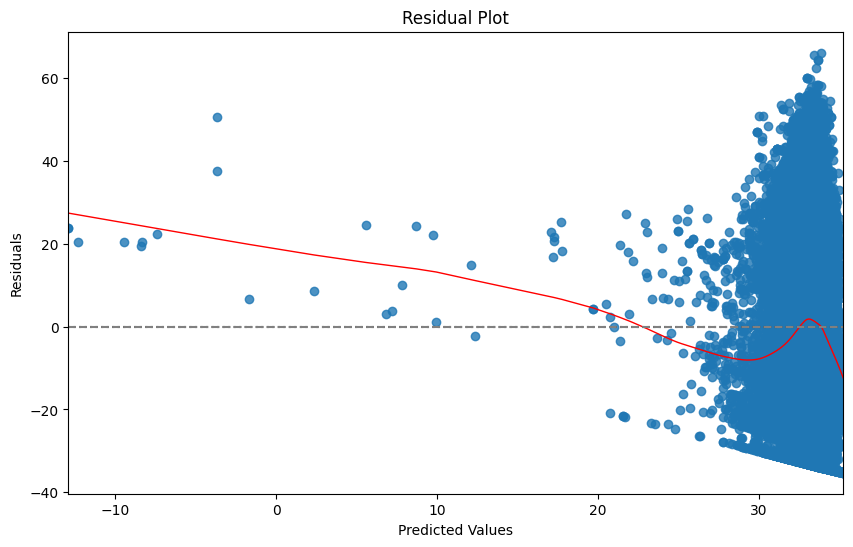

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             popularity   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     155.8
Date:                Fri, 15 Dec 2023   Prob (F-statistic):           1.07e-35
Time:                        15:02:27   Log-Likelihood:            -2.3383e+05
No. Observations:               52000   AIC:                         4.677e+05
Df Residuals:                   51998   BIC:                         4.677e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         35.4414      0.209    169.380      0.000      35.031      35.852
duration    -1.01e-05   8.09e-07    -12.481      0.000   -1.17e-05   -8.51e-06
==============================================================================
Omnibus:                     7668.685   Durbin-Watson:                   0.573
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1850.489
Skew:                           0.072   Prob(JB):                         0.00
Kurtosis:                       2.087   Cond. No.                     5.68e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.68e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Linear regression model
X = data[['duration']]  # Predictor
y = data['popularity']  # Response
X = sm.add_constant(X)  # Adds a constant term to the predictor
model = sm.OLS(y, X).fit()

# Residuals
residuals = model.resid

# Predicted values
predicted = model.predict(X)

# Plotting the residual analysis
plt.figure(figsize=(10, 6))
sns.residplot(x=predicted, y=residuals, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='grey', linestyle='--')
plt.show()

model.summary()


**Answer for Question 2**

The analysis of the relationship between song duration and popularity in the dataset reveals a statistically significant yet exceedingly weak negative correlation. Both Pearson and Spearman correlation coefficients are minimal, with values of -0.05465 and -0.03729, respectively, indicating a slight negative trend but of very low strength. The linear regression model further substantiates this weak relationship, yielding an R-squared value of just 0.003, implying that song duration explains a mere 0.3% of the variance in song popularity. This is also evidenced by a regression coefficient for duration at a minuscule -1.01e-05, with a statistically significant p-value close to 0. Collectively, these analyses indicate that while there is a statistically significant relationship between song duration and popularity, its practical impact is almost negligible, pointing towards a very limited influence of song duration on a song's popularity.

Explicitly rated song statictics:
count    5597.000000
mean       35.813114
std        22.599548
min         0.000000
25%        21.000000
50%        34.000000
75%        54.000000
max        98.000000
Name: popularity, dtype: float64

Not explicitly rated song statictics:
count    46403.000000
mean        32.790595
std         21.615697
min          0.000000
25%         17.000000
50%         33.000000
75%         50.000000
max        100.000000
Name: popularity, dtype: float64


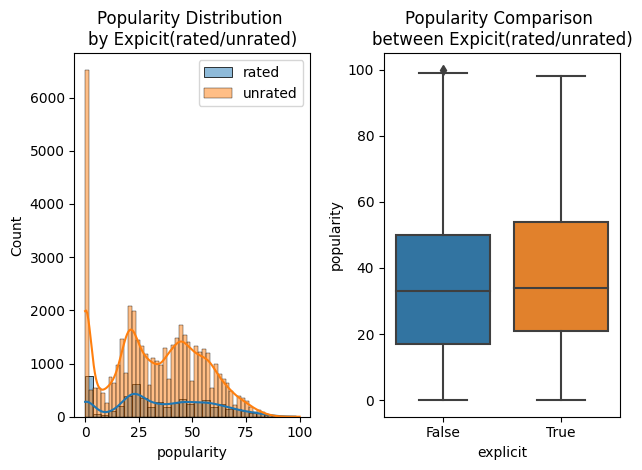

In [20]:
#Code for Question 3

rated_songs = data[data['explicit'] == True]
unrated_songs = data[data['explicit'] == False]

print("Explicitly rated song statictics:")
print(rated_songs['popularity'].describe())

print("\nNot explicitly rated song statictics:")
print(unrated_songs['popularity'].describe())

# Histograms
plt.subplot(1, 2, 1)
sns.histplot(rated_songs['popularity'], kde=True, label='rated')
sns.histplot(unrated_songs['popularity'], kde=True, label='unrated')
plt.title('Popularity Distribution \nby Expicit(rated/unrated)')
plt.legend()

# Box plots
plt.subplot(1, 2, 2)
sns.boxplot(x='explicit', y='popularity', data=data)
plt.title('Popularity Comparison \nbetween Expicit(rated/unrated)')

plt.tight_layout()
plt.show()

In [21]:
from scipy.stats import mannwhitneyu

# Separate the groups
explicit_songs = data[data['explicit'] == True]['popularity']
non_explicit_songs = data[data['explicit'] == False]['popularity']

# Perform the Mann-Whitney U Test
u_statistic, p_value = mannwhitneyu(explicit_songs, non_explicit_songs)

u_statistic, p_value


(139361273.5, 3.0679199339114678e-19)

**Answer for Question 3**

The Mann-Whitney U Test comparing the popularity of explicit songs to non-explicit songs in the dataset yielded the following results:

- **U Statistic**: 139,361,273.5
- **p-value**: approximately 3.07e-19

Based on the Mann-Whitney U Test results and the provided descriptive statistics for the two groups of songs (explicitly rated and not explicitly rated), we can draw the following conclusion:

The Mann-Whitney U Test indicated a statistically significant difference in the popularity distributions between explicitly rated songs and non-explicitly rated songs. Looking at the descriptive statistics:

- **Explicitly Rated Songs**: Have a higher mean popularity (35.81) compared to non-explicitly rated songs (32.79). The median popularity is also slightly higher for explicitly rated songs (34) than for non-explicitly rated songs (33).

- **Not Explicitly Rated Songs**: While having a lower mean popularity, this group shows a wide range of popularity scores, as indicated by its minimum and maximum values (0 to 100).

The conclusion is that explicitly rated songs tend to be more popular than non-explicitly rated songs in this dataset. This is evident from both the higher mean and median popularity scores of the explicit group. However, it's important to note that while the difference is statistically significant, the actual difference in mean popularity is relatively small. Therefore, while explicit content appears to be associated with slightly higher popularity, other factors also significantly influence a song's popularity.

Songs in Major Key statictics:
count    32391.000000
mean        32.758390
std         21.538114
min          0.000000
25%         18.000000
50%         32.000000
75%         49.000000
max        100.000000
Name: popularity, dtype: float64

Songs in Minor statictics:
count    19609.000000
mean        33.706512
std         22.066963
min          0.000000
25%         17.000000
50%         34.000000
75%         51.000000
max         98.000000
Name: popularity, dtype: float64


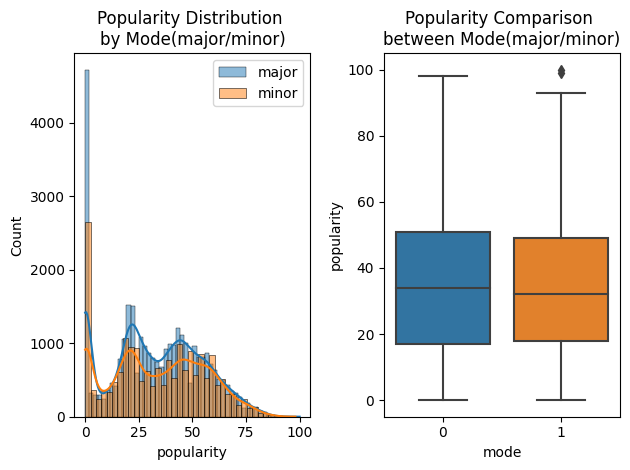

In [22]:
#Code for Question 4

major_songs = data[data['mode'] == 1]
minor_songs = data[data['mode'] == 0]

print("Songs in Major Key statictics:")
print(major_songs['popularity'].describe())

print("\nSongs in Minor statictics:")
print(minor_songs['popularity'].describe())

# Histograms
plt.subplot(1, 2, 1)
sns.histplot(major_songs['popularity'], kde=True, label='major')
sns.histplot(minor_songs['popularity'], kde=True, label='minor')
plt.title('Popularity Distribution \nby Mode(major/minor)')
plt.legend()

# Box plots
plt.subplot(1, 2, 2)
sns.boxplot(x='mode', y='popularity', data=data)
plt.title('Popularity Comparison \nbetween Mode(major/minor)')

plt.tight_layout()
plt.show()

In [23]:
from scipy import stats

# Step 1: Filter the data
group1 = major_songs['popularity']
group2 = minor_songs['popularity']

# Step 2: Perform the T-Test
# Perform the Mann-Whitney U Test
u_statistic, p_value = mannwhitneyu(group1, group2)

u_statistic, p_value

(309702373.0, 2.0175287554899416e-06)

**Answer for Question 4**

Based on the provided statistics and the Mann-Whitney U Test results, we can draw a conclusion for Question 4, which pertains to the comparison of song popularity between major and minor keys.

**Descriptive Statistics Summary**:
- **Songs in Major Key**: Mean popularity = 32.76, Standard Deviation = 21.54.
- **Songs in Minor Key**: Mean popularity = 33.71, Standard Deviation = 22.07.

**Mann-Whitney U Test Results**:
- **U Statistic**: 309,702,373
- **p-value**: Approximately 2.02e-06

**Interpretation**:

1. **Descriptive Statistics**: The mean popularity is slightly higher for songs in a minor key (33.71) compared to those in a major key (32.76). This suggests that, on average, songs in a minor key might be slightly more popular than those in a major key.

2. **Mann-Whitney U Test**: The p-value of approximately 2.02e-06 is significantly lower than the typical alpha level of 0.05, indicating a statistically significant difference in the popularity distributions between songs in major and minor keys.

**Conclusion**:

The Mann-Whitney U Test, a non-parametric test used to compare two independent samples, indicates a significant difference in popularity between songs in major and minor keys. Specifically, songs in a minor key tend to be slightly more popular than those in a major key. While the difference in mean popularity is relatively small, it is statistically significant.

<function matplotlib.pyplot.show(close=None, block=None)>

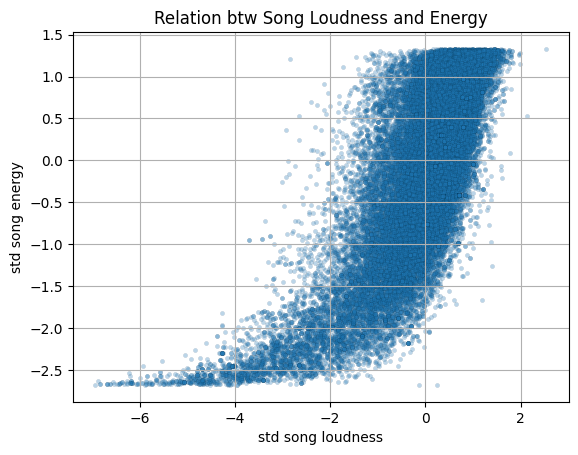

In [24]:
#Code for Question 5

loudness_std = makeStandard('loudness')
energy_std = makeStandard('energy')

plt.scatter(loudness_std, energy_std, s=10, alpha=0.3, edgecolors='black', linewidths=0.1)
plt.xlabel('std song loudness')
plt.ylabel('std song energy')
plt.title('Relation btw Song Loudness and Energy')
plt.grid(True)

plt.show

In [25]:
from scipy.stats import pearsonr, spearmanr


# Pearson correlation (for linear relationship)
pearson_corr, pearson_pvalue = pearsonr(loudness_std, energy_std)

# Spearman correlation (for non-linear/monotonic relationship)
spearman_corr, spearman_pvalue = spearmanr(loudness_std, energy_std)

pearson_corr, pearson_pvalue, spearman_corr, spearman_pvalue

(0.7748808291850187, 0.0, 0.7306382054765808, 0.0)

**Answer for Question 5**

1. **Pearson Correlation Coefficient**:
   - **Value**: 0.7749
   - **p-value**: 0.0
   - **Interpretation**: This is a high positive correlation, suggesting a strong linear relationship between song loudness and energy. The high value indicates that as loudness increases, energy also tends to increase in a linear manner. The p-value being 0.0 (which typically indicates a value less than the threshold of significance, e.g., 0.05) suggests that this correlation is statistically significant.

2. **Spearman Correlation Coefficient**:
   - **Value**: 0.7306
   - **p-value**: 0.0
   - **Interpretation**: This is also a high positive correlation, indicating a strong monotonic relationship between song loudness and energy. This means that as loudness increases, energy generally increases, but the relationship may not strictly be linear. The p-value of 0.0 indicates that this correlation is statistically significant.

**Overall Conclusion**:
The high and statistically significant values of both Pearson and Spearman correlation coefficients substantiate the claim that energy is largely reflective of the loudness of a song. There is a strong and consistent relationship between these two audio features, meaning that louder songs are generally more energetic. This finding aligns with the intuitive understanding of these characteristics in music, where increased loudness often corresponds to higher energy levels in a song.

Feature: instrumentalness, R-squared: 0.021016959224751663
Feature: loudness, R-squared: 0.0036252482924015172
Feature: energy, R-squared: 0.003127571026005138
Feature: duration, R-squared: 0.00298675321727615
Feature: speechiness, R-squared: 0.0023554207449606457
Feature: liveness, R-squared: 0.001922474338847624
Feature: danceability, R-squared: 0.0013807029448721364
Feature: valence, R-squared: 0.0012794062738639145
Feature: acousticness, R-squared: 0.0006881908421284555
Feature: tempo, R-squared: 6.926535336626571e-06


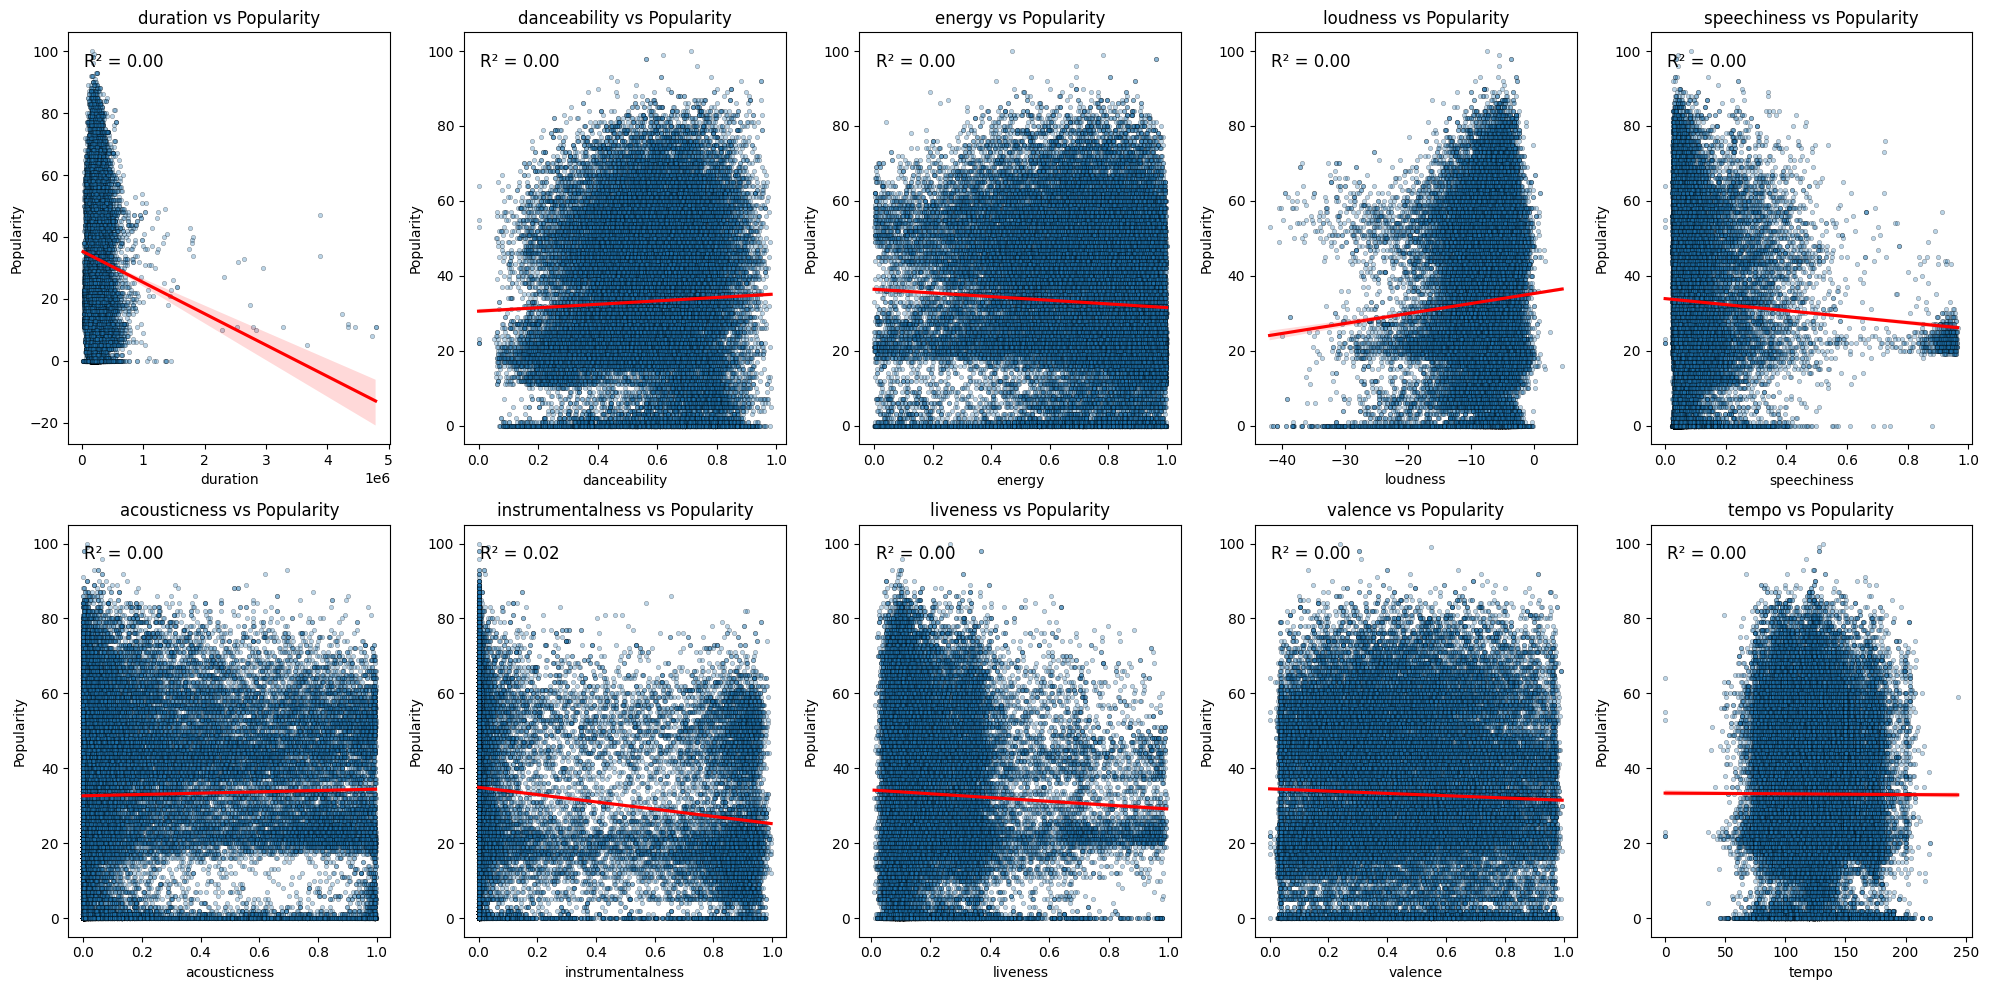

In [6]:
#Code for Question 6
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress


# Re-import the data here to avoid interruption with previous variables
df = pd.read_csv('/content/drive/My Drive/COLAB/DS101/project/spotify52kData.csv')


features = ['duration', 'danceability', 'energy', 'loudness', 'speechiness',
            'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
r_squared_values = {}

for feature in features:
    X = df[[feature]]  # Independent variable
    y = df['popularity']  # Dependent variable

    # Adding a constant to the model (intercept)
    X = sm.add_constant(X)

    # Fitting the regression model
    model = sm.OLS(y, X).fit()

    # Storing the R-squared value
    r_squared_values[feature] = model.rsquared

# Sorting features based on their R-squared values
sorted_features = sorted(r_squared_values.items(), key=lambda x: x[1], reverse=True)
for feature, r_squared in sorted_features:
    print(f"Feature: {feature}, R-squared: {r_squared}")

# Create a 2x5 grid of scatter plots with enhanced visuals
fig, axes = plt.subplots(2, 5, figsize=(20, 10))
for i, feature in enumerate(features):
    row = i // 5
    col = i % 5
    ax = axes[row, col]

    # Enhanced scatter plot and regression line
    sns.regplot(x=df[feature], y=df['popularity'], ax=ax,
                scatter_kws={'alpha': 0.3, 's': 10, 'edgecolor': 'black', 'linewidth': 0.5},
                line_kws={'color': 'red'})

    # Calculate and display R-squared
    slope, intercept, r_value, p_value, std_err = linregress(df[feature], df['popularity'])
    ax.text(0.05, 0.95, f'R² = {r_value**2:.2f}', transform=ax.transAxes,
            fontsize=12, verticalalignment='top')

    ax.set_title(f"{feature} vs Popularity")
    ax.set_xlabel(feature)
    ax.set_ylabel('Popularity')

plt.tight_layout()
plt.show()


**Answer for Question 6**

1. **Instrumentalness as the Best Predictor**:
   - With an R-squared value of 0.021, "instrumentalness" emerges as the feature with the strongest relationship with song popularity among the ten features analyzed. This means that approximately 2.1% of the variance in song popularity can be explained by the instrumentalness of the song.

2. **Relative Predictive Power of Other Features**:
   - All other features have significantly lower R-squared values, indicating a weaker predictive power relative to instrumentalness. For instance, "loudness" and "energy" have R-squared values around 0.003, and the least predictive feature, "tempo," has an R-squared value close to zero.

3. **Overall Model Effectiveness**:
   - The highest R-squared value being only 0.021 indicates that even the best predictor among the analyzed features, instrumentalness, has a very limited ability to predict song popularity on its own.
   - This suggests that song popularity is a complex attribute influenced by a combination of factors, and a single audio feature cannot significantly predict it.

4. **Practical Implications**:
   - While instrumentalness is the best predictor among the features tested, its low R-squared value suggests that it is not a strong predictor in practical terms. This indicates the need for a more comprehensive model, possibly including multiple features or other factors not covered by these ten features, to effectively predict song popularity.

In conclusion, while instrumentalness is statistically the best predictor of song popularity among the ten features analyzed, its predictive power is quite limited. This suggests that popularity in music is influenced by a more complex set of factors beyond the scope of these individual audio features.

In [11]:
#Code for Question 7
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

X = df[features]
y = df['popularity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19473490)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Building a Random Forest Regressor model
rf_model = RandomForestRegressor(random_state=19473490)
rf_model.fit(X_train_scaled, y_train)

# Predicting and evaluating the model
y_pred = rf_model.predict(X_test_scaled)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Outputting the RMSE value
rmse

16.167869287792083

In [7]:
X = df[features]  # Independent variables
y = df['popularity']  # Dependent variable

X = sm.add_constant(X)  # Adds a constant term to the predictor
model = sm.OLS(y, X).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:             popularity   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     260.3
Date:                Fri, 15 Dec 2023   Prob (F-statistic):               0.00
Time:                        15:33:22   Log-Likelihood:            -2.3264e+05
No. Observations:               52000   AIC:                         4.653e+05
Df Residuals:                   51989   BIC:                         4.654e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               51.8404      0.977  

**Answer for Question 7**

The result from the RandomForestRegressor, along with the findings from the OLS regression, offers a comprehensive view for the prediction of song popularity using the 10 song features.

**Random Forest Regressor Result**:
- **RMSE (Root Mean Squared Error)**: 16.168
   - RMSE is a measure of the difference between the values predicted by a model and the values observed. It's particularly useful for regression models as it gives an idea of how much error to expect in the predictions.
   - An RMSE of 16.168 suggests that the predictions of the RandomForestRegressor model are, on average, about 16.168 units away from the actual popularity scores. Considering the popularity score range (0 to 100), this is a relatively high error, indicating that the model's predictive accuracy is moderate but not highly precise.

**OLS Regression Result**:
- **R-squared**: 0.048
   - This indicated that about 4.8% of the variance in song popularity was explained by the 10 features using the OLS model, which is quite low.

**Combined Interpretation and Conclusion for Question 7**:
1. **Predictive Power**: Both models - the OLS regression and the Random Forest - indicate limited predictive power of the 10 song features on song popularity. The OLS model explains a small portion of the variance, and the RandomForestRegressor, while likely capturing more complex relationships, still has a relatively high prediction error.

2. **Model Complexity vs. Accuracy**: The Random Forest model, a more complex and flexible model than OLS, likely captures non-linear relationships and interactions between features. However, its RMSE suggests that even this increased complexity does not lead to highly accurate predictions.

3. **Complexity of Popularity**: The modest performance of both models suggests that song popularity is influenced by factors beyond the 10 features analyzed. These could include aspects like marketing, social influences, artist popularity, release timing, and other external factors not captured in the dataset.

4. **Usefulness of Models**: While neither model offers high precision in predicting song popularity, they can still provide valuable insights. For example, feature importance analysis from the Random Forest model can indicate which features are most influential in predicting popularity, even if the overall prediction error is relatively high.

In summary, the ability to predict song popularity based on the 10 features is limited, as evidenced by both the OLS and Random Forest models. This suggests the need for considering additional data and factors to more accurately predict song popularity.

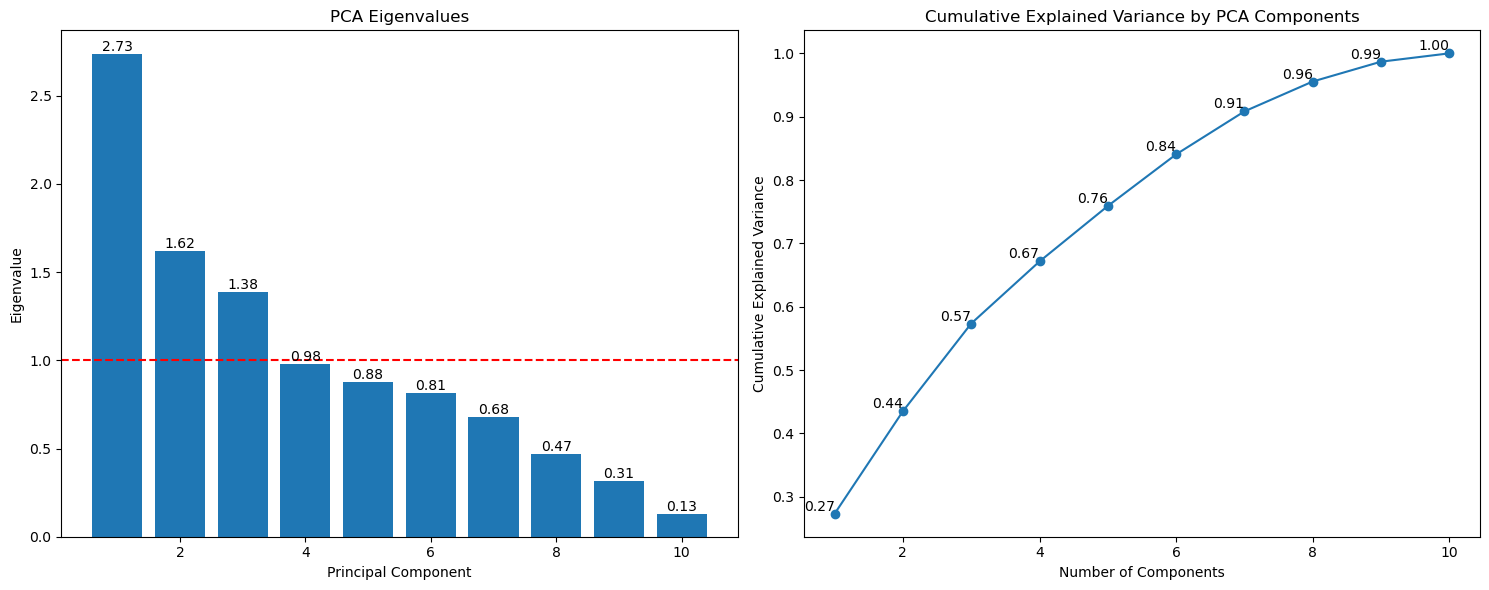

Eigenvalue 1: 2.73
Eigenvalue 2: 1.62
Eigenvalue 3: 1.38
Eigenvalue 4: 0.98
Eigenvalue 5: 0.88
Eigenvalue 6: 0.81
Eigenvalue 7: 0.68
Eigenvalue 8: 0.47
Eigenvalue 9: 0.31
Eigenvalue 10: 0.13
Cumulative Explained Variance for 1 components: 0.27
Cumulative Explained Variance for 2 components: 0.44
Cumulative Explained Variance for 3 components: 0.57
Cumulative Explained Variance for 4 components: 0.67
Cumulative Explained Variance for 5 components: 0.76
Cumulative Explained Variance for 6 components: 0.84
Cumulative Explained Variance for 7 components: 0.91
Cumulative Explained Variance for 8 components: 0.96
Cumulative Explained Variance for 9 components: 0.99
Cumulative Explained Variance for 10 components: 1.00


In [25]:
#Code for Question 8

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Re-import the data here to avoid interruption with previous variables
df = pd.read_csv('spotify52kData.csv')


features = ['duration', 'danceability', 'energy', 'loudness', 'speechiness',
            'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
X = df[features]

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA without specifying the number of components to get the full variance explanation
pca_full = PCA()
pca_full.fit(X_scaled)

# Extracting eigenvalues and explained variance
eigenvalues = pca_full.explained_variance_
explained_variance_ratio = pca_full.explained_variance_ratio_

# Creating subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot for Eigenvalues
axes[0].bar(range(1, len(eigenvalues) + 1), eigenvalues)
axes[0].axhline(y=1, color='r', linestyle='--')
axes[0].set_title('PCA Eigenvalues')
axes[0].set_xlabel('Principal Component')
axes[0].set_ylabel('Eigenvalue')
# Add labels to the bars
for i, val in enumerate(eigenvalues):
    axes[0].text(i + 1, val, f'{val:.2f}', ha='center', va='bottom')

# Plot for Cumulative Explained Variance
axes[1].plot(range(1, len(explained_variance_ratio) + 1), np.cumsum(explained_variance_ratio), marker='o')
axes[1].set_title('Cumulative Explained Variance by PCA Components')
axes[1].set_xlabel('Number of Components')
axes[1].set_ylabel('Cumulative Explained Variance')
# Add labels to the dots
for i, val in enumerate(np.cumsum(explained_variance_ratio)):
    axes[1].text(i + 1, val, f'{val:.2f}', ha='right', va='bottom')

plt.tight_layout()
plt.show()

# Print the Eigenvalues
for i, val in enumerate(eigenvalues):
    print(f'Eigenvalue {i + 1}: {val:.2f}')

# Print the Cumulative Explained Variance
for i, val in enumerate(np.cumsum(explained_variance_ratio)):
    print(f'Cumulative Explained Variance for {i + 1} components: {val:.2f}')

/Applications/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Applications/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Applications/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Applications/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change fr

Best num_clusters: 2
Best Silhouette Score: 0.19


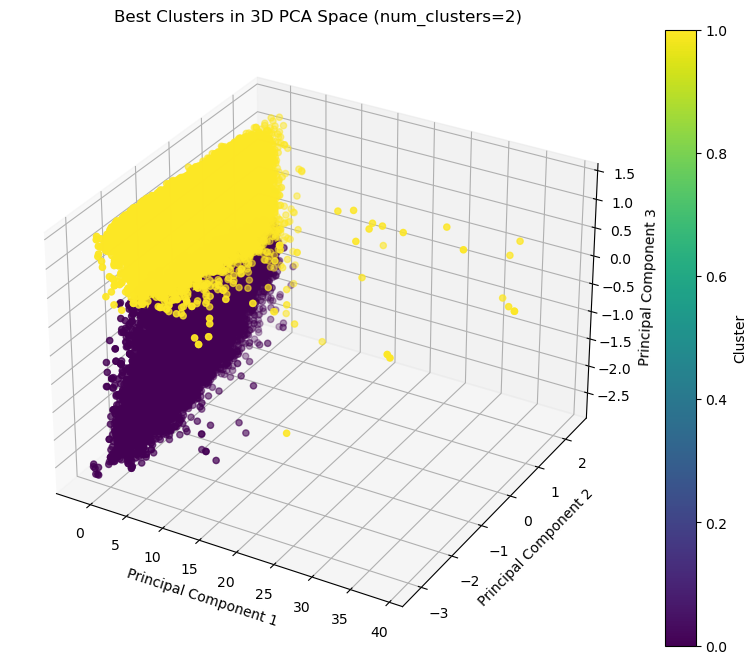

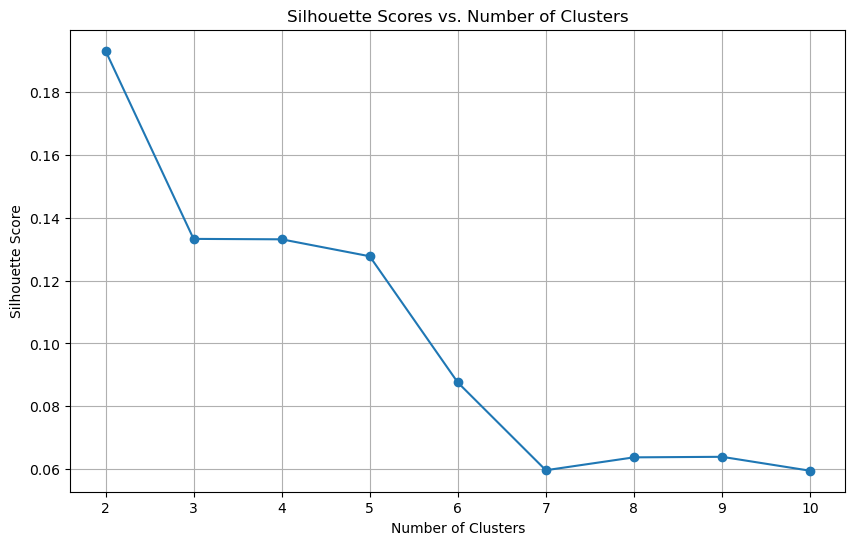

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import silhouette_score

# Define a range of num_clusters values to iterate through
num_clusters_range = range(2, 11)  # You can change the range as needed

# Create lists to store silhouette scores and cluster labels for each num_clusters
silhouette_scores = []
cluster_labels_list = []

# Iterate through num_clusters values
for num_clusters in num_clusters_range:
    # Fit K-means clustering on the first three principal components
    kmeans = KMeans(n_clusters=num_clusters, random_state=19473490)
    cluster_labels = kmeans.fit_predict(X_scaled[:, :3])  # Use the first three principal components

    # Calculate silhouette score
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    cluster_labels_list.append(cluster_labels)

# Find the index of the num_clusters with the highest silhouette score
best_num_clusters_index = np.argmax(silhouette_scores)
best_num_clusters = num_clusters_range[best_num_clusters_index]

# Print the best num_clusters and its corresponding silhouette score
print(f"Best num_clusters: {best_num_clusters}")
print(f"Best Silhouette Score: {silhouette_scores[best_num_clusters_index]:.2f}")

# Create a 3D scatter plot for the best num_clusters
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
cluster_labels = cluster_labels_list[best_num_clusters_index]
scatter = ax.scatter(X_scaled[:, 0], X_scaled[:, 1], X_scaled[:, 2], c=cluster_labels, cmap='viridis')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
colorbar = fig.colorbar(scatter)
colorbar.set_label('Cluster')
plt.title(f'Best Clusters in 3D PCA Space (num_clusters={best_num_clusters})')
plt.show()

# Plot Silhouette Scores for all num_clusters values
plt.figure(figsize=(10, 6))
plt.plot(num_clusters_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores vs. Number of Clusters')
plt.grid(True)
plt.show()


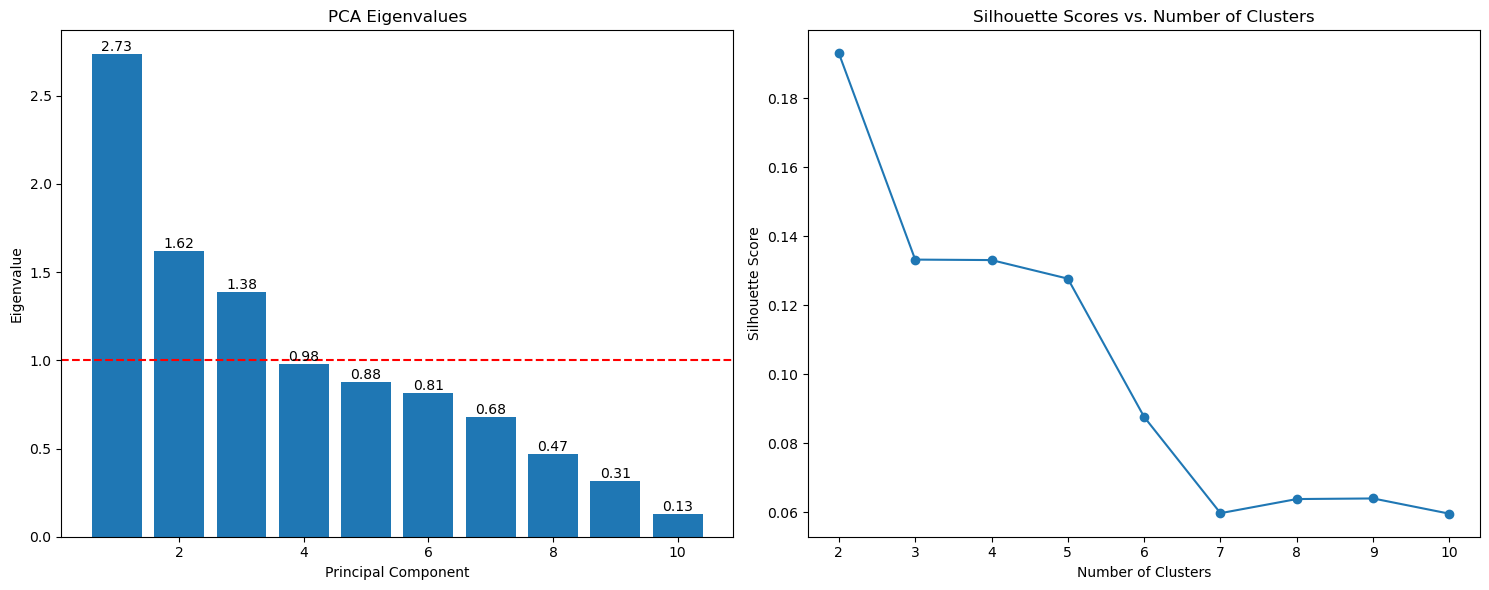

In [29]:
# Creating subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot for Eigenvalues
axes[0].bar(range(1, len(eigenvalues) + 1), eigenvalues)
axes[0].axhline(y=1, color='r', linestyle='--')
axes[0].set_title('PCA Eigenvalues')
axes[0].set_xlabel('Principal Component')
axes[0].set_ylabel('Eigenvalue')
# Add labels to the bars
for i, val in enumerate(eigenvalues):
    axes[0].text(i + 1, val, f'{val:.2f}', ha='center', va='bottom')

axes[1].plot(num_clusters_range, silhouette_scores, marker='o')
axes[1].set_xlabel('Number of Clusters')
axes[1].set_ylabel('Silhouette Score')
axes[1].set_title('Silhouette Scores vs. Number of Clusters')

plt.tight_layout()
plt.show()

**Answer for Question 8**


Based on the eigenvalues and cumulative explained variance:

1. We can extract three meaningful principal components, as the first three eigenvalues are greater than 1.

2. These principal components account for 57% of the total variance in the data.

3. Cluster Identification Using K-Means: our performed silhouette analysis for k-means clustering with the number of clusters ranging from 2 to 11. The best silhouette score obtained was 0.19 for 2 clusters (k=2). A score of 0.19 suggests a weak to moderate structure has been found. While the clusters are distinct, the separation between them is not very strong.

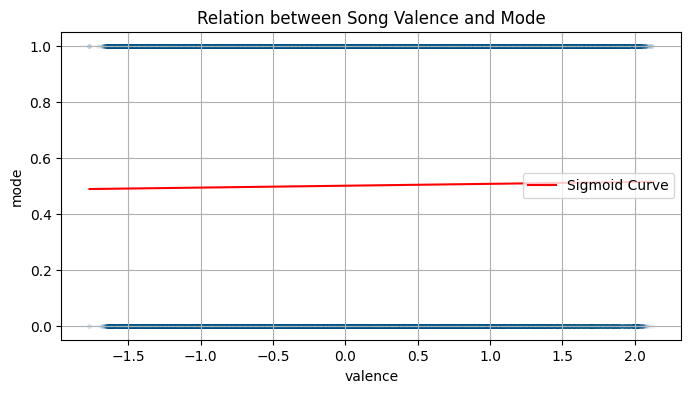

Accuracy: 0.5023076923076923
Confusion Matrix:
[[2170 1814]
 [3362 3054]]
Classification Report:
              precision    recall  f1-score   support

           0       0.39      0.54      0.46      3984
           1       0.63      0.48      0.54      6416

    accuracy                           0.50     10400
   macro avg       0.51      0.51      0.50     10400
weighted avg       0.54      0.50      0.51     10400



In [7]:
#Code for Question 9

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

mode = df['mode']
valence = df['valence']

# Standardize the 'valence' variable
scaler = StandardScaler()
valence_scaled = scaler.fit_transform(valence.values.reshape(-1, 1))

plt.figure(figsize=(8, 4))
plt.scatter(valence_scaled, mode, s=10, alpha=0.05, edgecolors='black', linewidths=0.1)
plt.xlabel('valence')
plt.ylabel('mode')
plt.title('Relation between Song Valence and Mode')
plt.grid(True)

# Logistic Regression
logistic_model = LogisticRegression(class_weight='balanced', random_state=19473490)
logistic_model.fit(valence_scaled, mode)

# Define a range of 'valence' values for plotting
valence_values = np.linspace(valence_scaled.min(), valence_scaled.max(), 100).reshape(-1, 1)

# Calculate predicted probabilities for each 'valence' value
predicted_probs = logistic_model.predict_proba(valence_values)[:, 1]

# Plot the logistic regression Sigmoid curve
plt.plot(valence_values, predicted_probs, color='red', label='Sigmoid Curve')

# Show the plot
plt.legend(loc='best')
plt.show()

# Split your dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(valence_scaled, mode, test_size=0.2, random_state=19473490)

# Create and fit a logistic regression model
logistic_model = LogisticRegression(class_weight='balanced', random_state=19473490)
logistic_model.fit(X_train, y_train)

# Make predictions using the trained model
y_pred = logistic_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")


**Answer for Question 9**

Interpretion of the Results:

1. **Accuracy**: The accuracy of the model is approximately 50.23%, which is slightly better than random guessing (50% for binary classification). However, it's not a very high accuracy, indicating that the 'valence' variable alone may not be a strong predictor for determining whether a song is in a major or minor key.

2. **Confusion Matrix**: The confusion matrix shows that there are both true positives (2170) and true negatives (3054), but there are also false positives (1814) and false negatives (3362). This indicates that the model is making both correct and incorrect predictions.

3. **Classification Report**: The precision, recall, and F1-score for both classes (0 and 1) are relatively balanced, but they are not particularly high. The F1-scores are around 0.46 for class 0 and 0.54 for class 1.

Overall, while the model is better than random guessing, it may not be a strong predictor for determining whether a song is in a major or minor key based solely on the 'valence' variable.

To answer question9 :

**Can you predict whether a song is in a major or minor key from valence?**
Yes, we can make predictions, but the model's accuracy is relatively low (slightly better than random guess), and it may not be a very reliable predictor on its own.

**If so, how good is this prediction?**
The prediction is not very good. The accuracy of around 50% suggests that the model is not much better than random chance. It's possible that other features or variables are needed to improve predictive performance.

**If not, is there a better predictor?**
It's possible that 'valence' alone may not be a strong predictor for determining the key of a song. We may want to consider incorporating additional features or variables that are more relevant to musical key determination, such as key signature, chord progressions, or tonal characteristics. Additionally, domain-specific knowledge or domain-specific models might be helpful in improving prediction accuracy for this specific task.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

random_seed = 19473490

data = pd.read_csv('/content/drive/My Drive/COLAB/DS101/project/spotify52kData.csv')

# data = data.dropna()

data.head(10)

Mounted at /content/drive


,songNumber,artists,album_name,track_name,popularity,duration,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
5,5,Tyrone Wells,Days I Will Remember,Days I Will Remember,58,214240,False,0.688,0.4810,6,-8.807,1,0.1050,0.2890,0.000000,0.1890,0.6660,98.017,4,acoustic
6,6,A Great Big World;Christina Aguilera,Is There Anybody Out There?,Say Something,74,229400,False,0.407,0.1470,2,-8.822,1,0.0355,0.8570,0.000003,0.0913,0.0765,141.284,3,acoustic
7,7,Jason Mraz,We Sing. We Dance. We Steal Things.,I'm Yours,80,242946,False,0.703,0.4440,11,-9.331,1,0.0417,0.5590,0.000000,0.0973,0.7120,150.960,4,acoustic
8,8,Jason Mraz;Colbie Caillat,We Sing. We Dance. We Steal Things.,Lucky,74,189613,False,0.625,0.4140,0,-8.700,1,0.0369,0.2940,0.000000,0.1510,0.6690,130.088,4,acoustic
9,9,Ross Copperman,Hunger,Hunger,56,205594,False,0.442,0.6320,1,-6.770,1,0.0295,0.4260,0.004190,0.0735,0.1960,78.899,4,acoustic


In [2]:
#Code for Question 10

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Selecting the features and target variable
features = ['duration', 'danceability', 'energy', 'loudness', 'speechiness',
            'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
X = data[features]
y = data['track_genre']

# Encoding the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=19473490)

# Training a Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=19473490)
clf.fit(X_train, y_train)

# Predicting and evaluating the model
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

accuracy


0.24371794871794872

In [3]:
from sklearn.ensemble import RandomForestClassifier

# Training a Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=19473490)
rf_clf.fit(X_train, y_train)

# Predicting and evaluating the model
y_pred_rf = rf_clf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

accuracy_rf


0.35096153846153844

In [4]:
from sklearn.model_selection import cross_val_score

# Performing cross-validation on the Random Forest model
cv_scores = cross_val_score(RandomForestClassifier(random_state=19473490), X_train, y_train, cv=5)

# Calculating the average accuracy from cross-validation
avg_cv_accuracy = cv_scores.mean()
avg_cv_accuracy


0.35793956043956043

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


# Selecting features and target variable
X = data[features]
y = data['track_genre']

# Encoding the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=19473490)

# Standardizing the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Applying PCA to reduce dimensionality
pca_reduced = PCA(n_components=7)
X_train_pca_reduced = pca_reduced.fit_transform(X_train_scaled)
X_test_pca_reduced = pca_reduced.transform(X_test_scaled)

# Training the Random Forest Classifier on the reduced dataset
rf_clf_pca = RandomForestClassifier(random_state=19473490)
rf_clf_pca.fit(X_train_pca_reduced, y_train)

# Predicting and evaluating the model on the reduced dataset
y_pred_rf_pca = rf_clf_pca.predict(X_test_pca_reduced)
accuracy_rf_pca = accuracy_score(y_test, y_pred_rf_pca)

accuracy_rf_pca


0.3041025641025641

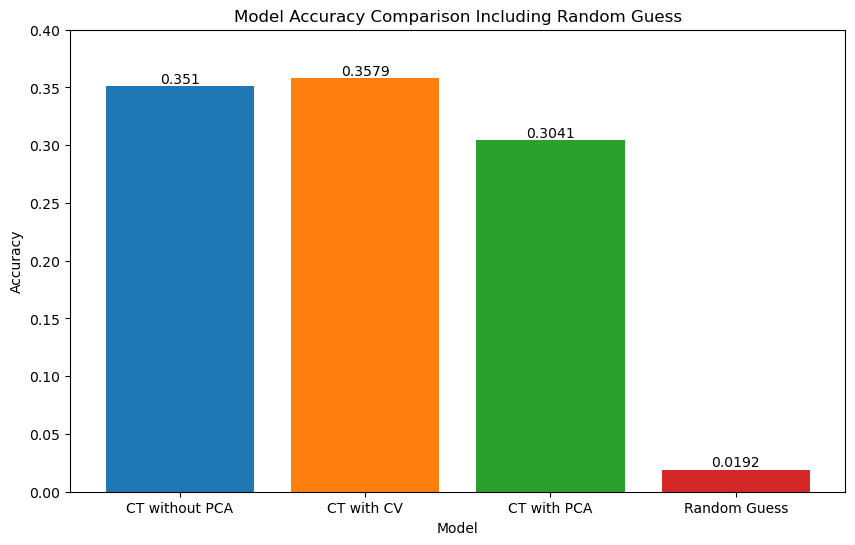

In [4]:
import matplotlib.pyplot as plt

accuracy_random_guess = 1 / 52
accuracies = {
    "CT without PCA": 0.35096153846153844,
    "CT with CV": 0.35793956043956043,
    "CT with PCA": 0.3041025641025641,
    "Random Guess": accuracy_random_guess
}

# Colors, adding a different color for random guess
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

# Creating the improved plot
plt.figure(figsize=(10, 6))
bars = plt.bar(accuracies.keys(), accuracies.values(), color=colors)

# Adding accuracy values on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 4), ha='center', va='bottom')

# Aesthetics
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison Including Random Guess')
plt.ylim(0, 0.4)
plt.show()


**Answer for Question 10**

Based on the results we observed:

1. **Random Forest without PCA**: Achieved an accuracy of approximately 35.10%.
2. **Random Forest with Cross-Validation**: Had an accuracy close to 35.79%.
3. **Random Forest with PCA**: Resulted in an accuracy of about 30.41%.

In answering the question:

Yes, we can predict the genre from both the 10 song features directly and the principal components extracted. However, the effectiveness of the prediction varies:

- **Direct Prediction with Original Features**: Using the original 10 features without dimensionality reduction (PCA) provided better results. The Random Forest model yielded an accuracy of around 35.10%, and with cross-validation, the accuracy was slightly higher at approximately 35.79%. This suggests that all the original features contribute useful information for genre classification.

- **Prediction with Principal Components**: After applying PCA and reducing the dimensionality of the data, the accuracy dropped to about 30.41%. This decrease in accuracy indicates that while PCA helps in reducing the complexity of the model and potentially mitigating overfitting, it also leads to a loss of information that is significant for the genre prediction task.

In conclusion, for this specific task of predicting music genres, using all the 10 features without PCA seems to be more effective. The Random Forest model, particularly with cross-validation, appears to be a suitable choice for this classification problem, even though there is still room for improvement in terms of accuracy.

In [1]:
#Code for Extra Credit

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

random_seed = 19473490

data = pd.read_csv('spotify52kData.csv')

data = data.dropna()

data.head(10)

,songNumber,artists,album_name,track_name,popularity,duration,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
5,5,Tyrone Wells,Days I Will Remember,Days I Will Remember,58,214240,False,0.688,0.4810,6,-8.807,1,0.1050,0.2890,0.000000,0.1890,0.6660,98.017,4,acoustic
6,6,A Great Big World;Christina Aguilera,Is There Anybody Out There?,Say Something,74,229400,False,0.407,0.1470,2,-8.822,1,0.0355,0.8570,0.000003,0.0913,0.0765,141.284,3,acoustic
7,7,Jason Mraz,We Sing. We Dance. We Steal Things.,I'm Yours,80,242946,False,0.703,0.4440,11,-9.331,1,0.0417,0.5590,0.000000,0.0973,0.7120,150.960,4,acoustic
8,8,Jason Mraz;Colbie Caillat,We Sing. We Dance. We Steal Things.,Lucky,74,189613,False,0.625,0.4140,0,-8.700,1,0.0369,0.2940,0.000000,0.1510,0.6690,130.088,4,acoustic
9,9,Ross Copperman,Hunger,Hunger,56,205594,False,0.442,0.6320,1,-6.770,1,0.0295,0.4260,0.004190,0.0735,0.1960,78.899,4,acoustic


In [6]:
# Identifying the top 10% most popular songs
# Sort the DataFrame by the 'popularity' column in descending order
sorted_data = data.sort_values(by='popularity', ascending=False)

# Calculate the number of songs that make up the top 10%
top_10_percent_count = int(len(sorted_data) * 0.1)

# Select the top 10% of songs
top_10_percent_songs = sorted_data.head(top_10_percent_count)

# Display the first few rows of the top 10% songs for verification
top_10_percent_songs.head()


,songNumber,artists,album_name,track_name,popularity,duration,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
20001,20001,Sam Smith;Kim Petras,Unholy (feat. Kim Petras),Unholy (feat. Kim Petras),100,156943,False,0.714,0.472,2,-7.375,1,0.0864,0.01300,0.000005,0.266,0.238,131.121,4,dance
51664,51664,Bizarrap;Quevedo,"Quevedo: Bzrp Music Sessions, Vol. 52","Quevedo: Bzrp Music Sessions, Vol. 52",99,198937,False,0.621,0.782,2,-5.548,1,0.0440,0.01250,0.033000,0.230,0.550,128.033,4,hip-hop
30003,30003,David Guetta;Bebe Rexha,I'm Good (Blue),I'm Good (Blue),98,175238,True,0.561,0.965,7,-3.673,0,0.0343,0.00383,0.000007,0.371,0.304,128.040,4,edm
20008,20008,David Guetta;Bebe Rexha,I'm Good (Blue),I'm Good (Blue),98,175238,True,0.561,0.965,7,-3.673,0,0.0343,0.00383,0.000007,0.371,0.304,128.040,4,dance
20000,20000,Chris Brown,Indigo (Extended),Under The Influence,96,184613,True,0.733,0.690,9,-5.529,0,0.0427,0.06350,0.000001,0.105,0.310,116.992,4,dance


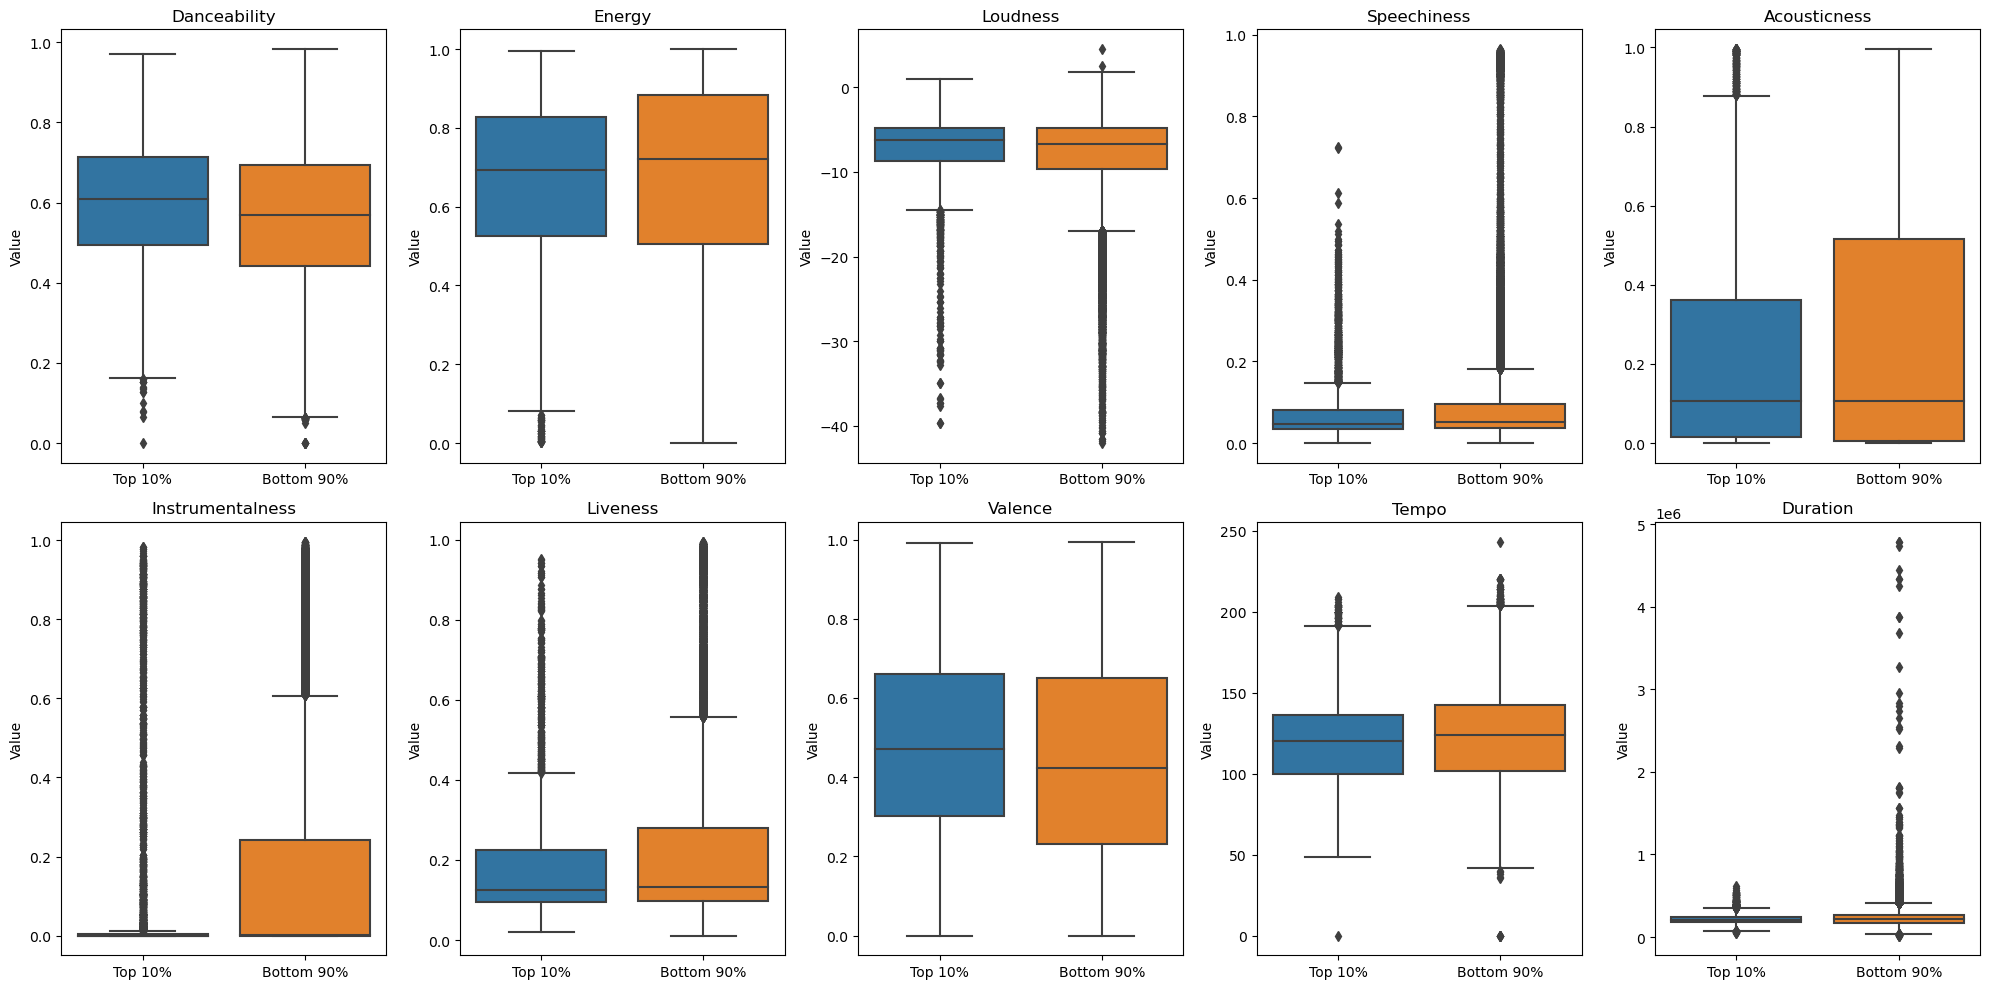

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Selecting the bottom 90% of songs for comparison
bottom_90_percent_songs = sorted_data.tail(len(sorted_data) - top_10_percent_count)

# Selecting features for comparison
features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 
            'liveness', 'valence', 'tempo', 'duration']

# Creating boxplots for each feature to compare the distribution between top 10% and bottom 90%
plt.figure(figsize=(20, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 5, i)
    sns.boxplot(x='Popularity_Group', y=feature, 
                data=pd.concat([top_10_percent_songs.assign(Popularity_Group='Top 10%'),
                                bottom_90_percent_songs.assign(Popularity_Group='Bottom 90%')]))
    plt.title(feature.capitalize())
    plt.ylabel('Value')
    plt.xlabel('')

plt.tight_layout()
plt.show()


In [9]:
from scipy.stats import ttest_ind, chi2_contingency

# Preparing data for t-tests and chi-square tests
# Continuous features for t-test
continuous_features = ['danceability', 'energy', 'loudness', 'speechiness', 
                       'acousticness', 'instrumentalness', 'liveness', 
                       'valence', 'tempo', 'duration']

# Categorical features for chi-square test
categorical_features = ['explicit', 'key', 'mode', 'time_signature', 'track_genre']

# Performing t-tests for continuous features
t_test_results = {feature: ttest_ind(top_10_percent_songs[feature], bottom_90_percent_songs[feature], equal_var=False)
                  for feature in continuous_features}

# Preparing data for chi-square tests
chi_square_data = {feature: pd.crosstab(index=data[feature], 
                                        columns=data.index.isin(top_10_percent_songs.index))
                   for feature in categorical_features}

# Performing chi-square tests for categorical features
chi_square_results = {feature: chi2_contingency(chi_square_data[feature])[:2] 
                      for feature in categorical_features}

# Extracting p-values from the results
t_test_p_values = {feature: result[1] for feature, result in t_test_results.items()}
chi_square_p_values = {feature: result[1] for feature, result in chi_square_results.items()}

t_test_p_values, chi_square_p_values


({'danceability': 3.14857315719209e-63,
  'energy': 0.0028527634252530913,
  'loudness': 1.1320587946800568e-43,
  'speechiness': 3.9900001135391765e-61,
  'acousticness': 5.037504497893189e-31,
  'instrumentalness': 2.06442117882712e-309,
  'liveness': 5.176804018371974e-66,
  'valence': 2.5485841387734742e-23,
  'tempo': 4.119109678602218e-18,
  'duration': 3.503087140616216e-38},
 {'explicit': 1.5695063692391303e-32,
  'key': 0.000161357745821734,
  'mode': 3.3232466715861016e-05,
  'time_signature': 3.9858848047978606e-18,
  'track_genre': 0.0})

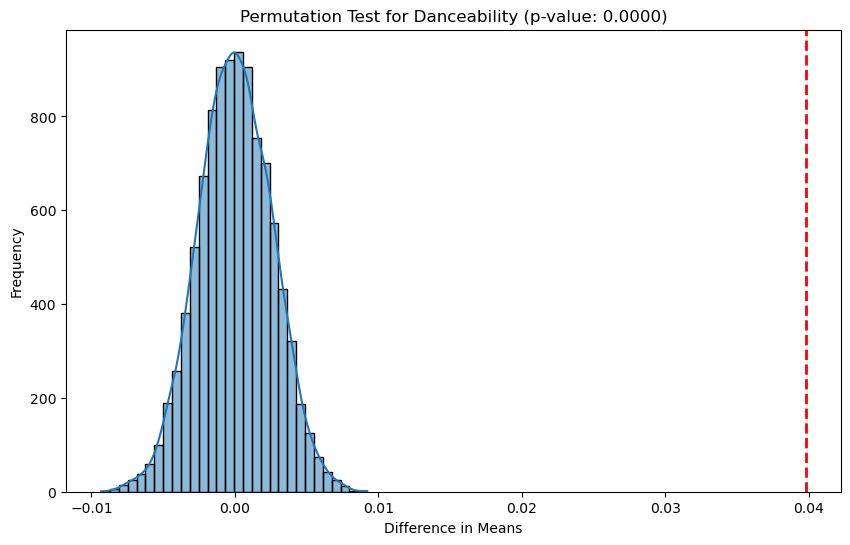

(0.03979946153846148, 0.0)

In [15]:
import numpy as np

# Function to perform a permutation test
def permutation_test(feature, group1, group2, n_permutations=10000):
    # Calculate the observed difference in means
    observed_diff = np.mean(group1[feature]) - np.mean(group2[feature])

    # Combine the data from both groups
    combined_data = np.concatenate([group1[feature], group2[feature]])

    # Count how many times the permuted difference is at least as extreme as the observed difference
    count_extreme_values = 0
    permuted_diffs = []
    for _ in range(n_permutations):
        # Shuffle the combined data and split into new groups
        np.random.shuffle(combined_data)
        new_group1 = combined_data[:len(group1)]
        new_group2 = combined_data[len(group1):]
        
        # Calculate the difference in means for the permuted groups
        permuted_diff = np.mean(new_group1) - np.mean(new_group2)
        permuted_diffs.append(permuted_diff)

        # Check if the permuted difference is at least as extreme as the observed difference
        if abs(permuted_diff) >= abs(observed_diff):
            count_extreme_values += 1

    # Calculate the p-value
    p_value = count_extreme_values / n_permutations

    return observed_diff, permuted_diffs, p_value

# Selecting the feature for the permutation test - let's start with 'danceability'
feature_to_test = 'danceability'

# Performing the permutation test
obs_diff, permuted_diffs, p_value = permutation_test(feature_to_test, top_10_percent_songs, bottom_90_percent_songs)

# Visualizing the distribution of permuted differences
plt.figure(figsize=(10, 6))
sns.histplot(permuted_diffs, bins=30, kde=True, color='#1f77b4')
plt.axvline(obs_diff, color='red', linestyle='dashed', linewidth=2)
plt.title(f'Permutation Test for {feature_to_test.capitalize()} (p-value: {p_value:.4f})')
plt.xlabel('Difference in Means')
plt.ylabel('Frequency')
plt.show()

obs_diff, p_value


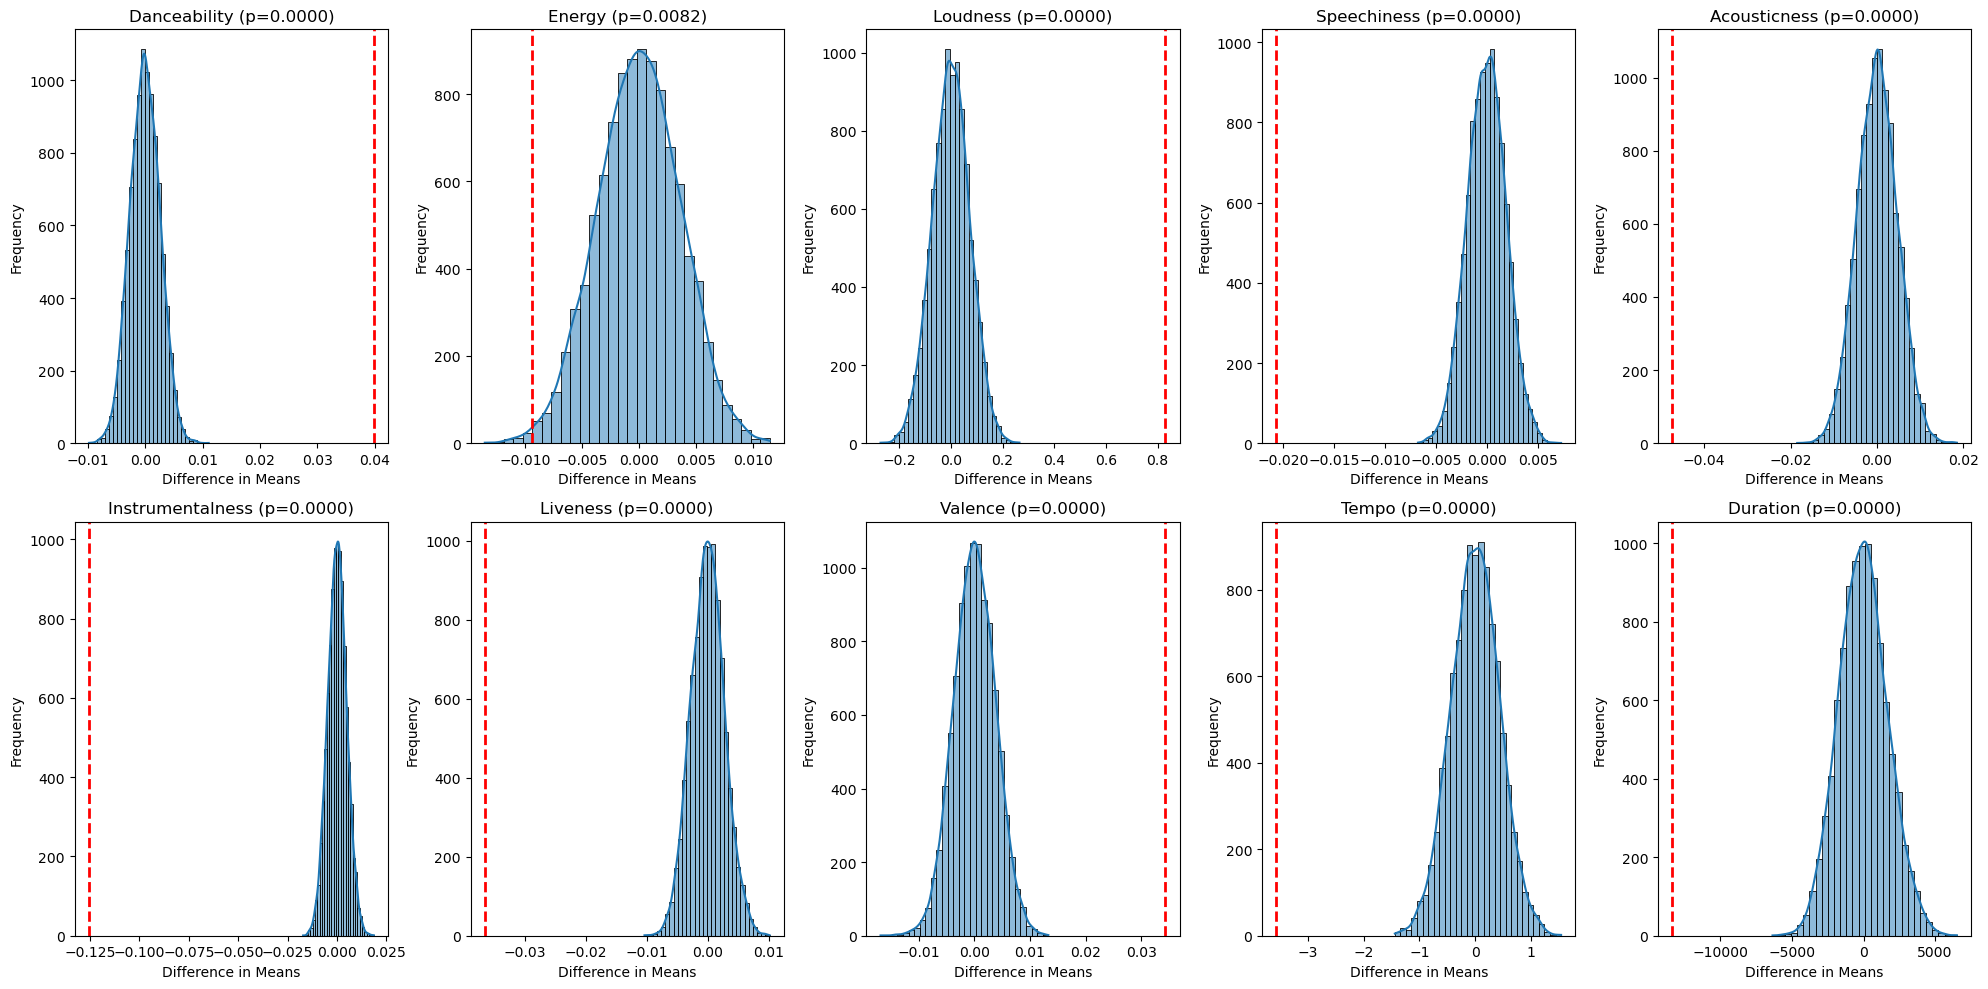

In [16]:
# Code to perform permutation tests for all numeric features and combine the plots

# Initialize a figure for the plots
fig, axes = plt.subplots(2, 5, figsize=(20, 10))
axes = axes.ravel()

# Results dictionary to store observed differences and p-values
results = {}

# Looping through each feature to perform permutation tests
for i, feature in enumerate(continuous_features):
    # Perform permutation test
    obs_diff, permuted_diffs, p_value = permutation_test(feature, top_10_percent_songs, bottom_90_percent_songs)

    # Store results
    results[feature] = {'Observed Difference': obs_diff, 'P-Value': p_value}

    # Plotting the distribution of permuted differences
    sns.histplot(permuted_diffs, bins=30, kde=True, color='#1f77b4', ax=axes[i])
    axes[i].axvline(obs_diff, color='red', linestyle='dashed', linewidth=2)
    axes[i].set_title(f'{feature.capitalize()} (p={p_value:.4f})')
    axes[i].set_xlabel('Difference in Means')
    axes[i].set_ylabel('Frequency')

# Adjust the layout
plt.tight_layout()
plt.show()

# Output the results dictionary (this will not be executed here)
# results

# This code will perform permutation tests for all numeric features and visualize their distributions.
# The results dictionary will contain the observed differences and p-values for each feature.
# Note: This code block is intended for execution in your local environment as it may be computationally intensive.


In [14]:
def print_results(results_dict):
    for feature, values in results_dict.items():
        print(f"Feature: {feature}")
        print(f"  Observed Difference: {values['Observed Difference']:.4f}")
        print(f"  P-Value: {values['P-Value']:.4f}\n")
        
print_results(results)

Feature: danceability
  Observed Difference: 0.0398
  P-Value: 0.0000

Feature: energy
  Observed Difference: -0.0094
  P-Value: 0.0101

Feature: loudness
  Observed Difference: 0.8302
  P-Value: 0.0000

Feature: speechiness
  Observed Difference: -0.0207
  P-Value: 0.0000

Feature: acousticness
  Observed Difference: -0.0474
  P-Value: 0.0000

Feature: instrumentalness
  Observed Difference: -0.1255
  P-Value: 0.0000

Feature: liveness
  Observed Difference: -0.0366
  P-Value: 0.0000

Feature: valence
  Observed Difference: 0.0343
  P-Value: 0.0000

Feature: tempo
  Observed Difference: -3.5597
  P-Value: 0.0000

Feature: duration
  Observed Difference: -13380.5711
  P-Value: 0.0000



**Answer for Extra Credit**

type answer here